In [3]:
# Dataset source: https://www.openml.org/d/50
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [5]:
tic_tac_toe_df = fetch_openml("tic-tac-toe", as_frame=True)

In [6]:
tic_tac_toe_df.data.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b


In [7]:
tic_tac_toe_df.target

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
953    negative
954    negative
955    negative
956    negative
957    negative
Name: Class, Length: 958, dtype: category
Categories (2, object): ['negative', 'positive']

In [9]:
X = tic_tac_toe_df.data
y = tic_tac_toe_df.target

In [10]:
X.isnull().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
dtype: int64

In [11]:
y.isnull().sum()

0

In [12]:
len(y)

958

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["top-left-square", "top-middle-square","top-right-square", "middle-left-square", "middle-middle-square", "middle-right-square", "bottom-left-square","bottom-middle-square", "bottom-right-square" ]
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    verbose_feature_names_out=False
)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
X_train_processed = preprocessor.fit_transform(X_train)

In [33]:
from sklearn.linear_model import LogisticRegressionCV

logistic_model = LogisticRegressionCV(Cs=np.logspace(-10, 10, 21), max_iter=10000)

In [35]:
logistic_model.fit(X_train_processed, y_train)

LogisticRegressionCV(Cs=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                     max_iter=10000)

In [36]:
logistic_model.C_


array([10.])

In [37]:
X_test_processed = preprocessor.transform(X_test)
y_test_hat = logistic_model.predict(X_test_processed)


In [42]:
from sklearn.metrics import accuracy_score, plot_roc_curve

accuracy_score(y_test, y_test_hat, )

0.9958333333333333

In [39]:
y.value_counts()

positive    626
negative    332
Name: Class, dtype: int64

/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


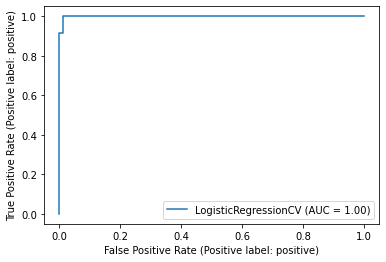

In [43]:
plot_roc_curve(estimator=logistic_model, X=X_test_processed, y=y_test)

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_model_simple = LogisticRegression()
logistic_model_simple.fit(X_train_processed, y_train)
y_test_hat_simple = logistic_model_simple.predict(X_test_processed)
accuracy_score(y_test, y_test_hat_simple)


0.9875

/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


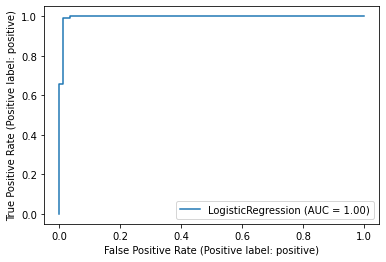

In [45]:
plot_roc_curve(estimator=logistic_model_simple, X=X_test_processed, y=y_test)
